In [215]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.classes.function import path_weight
from tqdm import tqdm

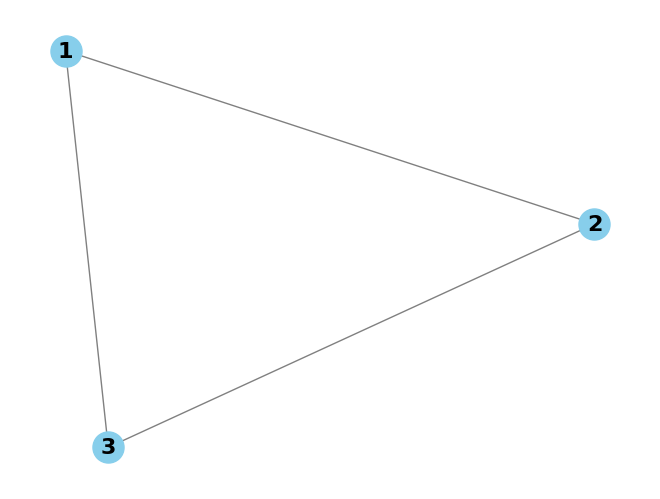

In [216]:
#  Exemplo de grafo simples

# Criação do grafo
G = nx.Graph()

# Adiciona nós
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Adiciona arestas entre os nós
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)

# Desenho do grafo
nx.draw(G, with_labels=True, node_color="skyblue", node_size=500, font_size=16, font_weight="bold", edge_color="gray")
plt.show()


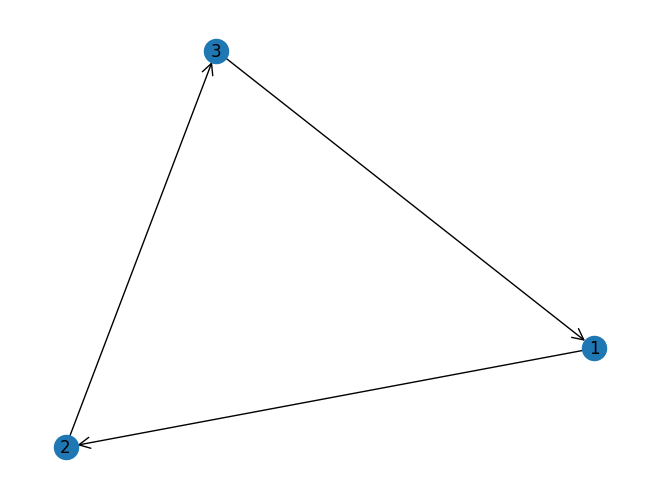

In [217]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 1)])  # Grafo com arestas direcionadas
nx.draw(G, with_labels=True, arrowstyle='->', arrowsize=20)
plt.show()


In [218]:
#  função criada pelo timber


def create_graph(transports):
    graph = {}

    # Creating the graph with the list of transports
    for i,transport in tqdm(transports.iterrows()):
        id_emp_orig = transport['node_src']
        id_emp_dest = transport['node_dest']

        volume = transport['vol']

        # Graph is a dict (source) -> (destination, weight)
        if graph.get(id_emp_orig) is None:
            # if source is not in the graph we need to map it as source to the destination
            graph[id_emp_orig] = {id_emp_dest: {'weight': volume }}
        else:
            # if source is already in the graph
            # 1. new destination from that source: create the edge
            # 2. source already mapped to destination: increase the volume in that edge
            if graph[id_emp_orig].get(id_emp_dest) is None:
                graph[id_emp_orig][id_emp_dest] = {'weight': volume }
            else:
                graph[id_emp_orig][id_emp_dest]['weight'] += volume

    # In this context we want to maximize paths over the volume
    # Since most functions minimizes over the weight of the edges,
    # we need to invert the relation
    for source, targets in graph.items():
        for target, volume in targets.items():
            graph[source][target]['weight'] = -1 * volume['weight']

    return nx.DiGraph(graph)

In [219]:
transportes_junho = pd.read_csv('../data/df_01.csv')

In [220]:
transportes_junho.head()

,Unnamed: 0.1,index,Unnamed: 0,Codigo,Registro,TpRegistro,OrigemID,NomeOrigem,CPF_CNPJ_Rem,CTFOrigem,...,Produto,NomePopular,NomeCientifico,Unidade,Volume,DtEmissao,Ano,Status,NomePopularAgregado,ID
0,2,2,2,1564782366682124,17264225,DOF,PTO-73304982000189,EUNILO ROQUE DE ALMEIDA & CIA LTDA,73304982000189,17603,...,Madeira serrada (vigota),Arianá,Qualeaparaensis,M3,0.4000,17/01/2017,2017,Emitido,Mandioqueiro,2
1,3,3,3,3916745881826981,17289999,DOF,PTO-12019924000119,ALEFE RODRIGO SILVA ALVES & CIA LTDA ME,12019924000119,5089868,...,Ripas,Cambará,Qualeaspp,M3,0.1750,21/01/2017,2017,Emitido,Mandioqueiro,3
2,4,4,4,3916745881826981,17289999,DOF,PTO-12019924000119,ALEFE RODRIGO SILVA ALVES & CIA LTDA ME,12019924000119,5089868,...,Madeira serrada (viga),Cambarápreto,Qualeaparaensis,M3,0.3850,21/01/2017,2017,Emitido,Mandioqueiro,4
3,6,11,11,5958452782252322,17328675,DOF,PTO-01473384000122,MADEIREIRA BURANELLO LTDA. - ME,1473384000122,81103,...,Madeira serrada (viga),Libra,Qualeaparaensis,M3,0.3580,30/01/2017,2017,Emitido,Mandioqueiro,6
4,8,20,20,4471244621618629,17213860,DOF,PTO-78706603000109,MATERIAIS PARA CONSTRUÇÃO OLIMPICO LTDA,78706603000109,47592,...,Madeira serrada (prancha),Cambarápreto,Qualeaalbiflora,M3,0.0815,05/01/2017,2017,Emitido,Mandioqueiro,8


In [221]:
transportes_junho['TpDes'].value_counts()

TpDes
FINAL        15508
PTO_IBAMA     6465
Name: count, dtype: int64

In [222]:
transportes_junho['TpRem'].value_counts()

TpRem
PTO_IBAMA    21834
MANEJO         139
Name: count, dtype: int64

In [223]:
contagem_tipos_rem = transportes_junho.groupby('CPF_CNPJ_Rem').size()
contagem_tipos_rem

CPF_CNPJ_Rem
2140460286         2
2488678490         6
2616690950         2
3385469953         9
3880912904         3
                  ..
95829131000192    10
96575972000183     6
96707302000173     1
97037295000102     2
97520331000356     1
Length: 1769, dtype: int64

In [224]:
contagem_tipos_rem_id = transportes_junho.groupby('OrigemID').size()
contagem_tipos_rem_id 

OrigemID
MANEJO-02140460286(1.308,-51.163)      2
MANEJO-02488678490(0.676,-51.89)       3
MANEJO-02616690950(-9.678,-64.828)     2
MANEJO-03385469953(-7.682,-62.605)     9
MANEJO-03880912904(-7.912,-61.716)     3
                                      ..
PTO-95829131000192                    10
PTO-96575972000183                     6
PTO-96707302000173                     1
PTO-97037295000102                     2
PTO-97520331000356                     1
Length: 1784, dtype: int64

In [225]:
contagem_tipos_des = transportes_junho.groupby('CPF_CNPJ_Des').size()
contagem_tipos_des 

CPF_CNPJ_Des
12757470          1
15100537          1
15199991          2
22741160          1
26258811          2
                 ..
95829131000192    6
97037295000102    1
97423834000141    4
97485593000165    1
97764302000178    1
Length: 12370, dtype: int64

In [226]:
contagem_tipos_des_id = transportes_junho.groupby('DestinoID').size()
contagem_tipos_des_id

DestinoID
FINAL-00012757470    1
FINAL-00015100537    1
FINAL-00015199991    2
FINAL-00022741160    1
FINAL-00027262979    1
                    ..
PTO-99054140887      1
PTO-99054655887      1
PTO-99316188172      1
PTO-99443554887      2
PTO-99911035115      1
Length: 12370, dtype: int64

Temos mais IDs de origem do que CNPJs de origem.
Já no caso dos CPF/CNPj dos destinatários, temos o mesmo número. 

In [227]:
#  Separando os nós pelo cnpj
transportes_junho.columns

Index(['Unnamed: 0.1', 'index', 'Unnamed: 0', 'Codigo', 'Registro',
       'TpRegistro', 'OrigemID', 'NomeOrigem', 'CPF_CNPJ_Rem', 'CTFOrigem',
       'EntJuridica_Rem', 'TpRem', 'UFOrigem', 'MunOrigem', 'LatOrigem',
       'LongOrigem', 'DestinoID', 'NomeDestino', 'CPF_CNPJ_Des', 'CTFDestino',
       'EntJuridica_Des', 'TpDes', 'UFDestino', 'MunDestino', 'LatDestino',
       'LongDestino', 'Autorizacao', 'TpAutorizacao', 'Produto', 'NomePopular',
       'NomeCientifico', 'Unidade', 'Volume', 'DtEmissao', 'Ano', 'Status',
       'NomePopularAgregado', 'ID'],
      dtype='object')

In [228]:
transportes_junho['TpRem']

0        PTO_IBAMA
1        PTO_IBAMA
2        PTO_IBAMA
3        PTO_IBAMA
4        PTO_IBAMA
           ...    
21968    PTO_IBAMA
21969    PTO_IBAMA
21970    PTO_IBAMA
21971    PTO_IBAMA
21972    PTO_IBAMA
Name: TpRem, Length: 21973, dtype: object

In [229]:
transportes_junho[['CPF_CNPJ_Rem', 'CPF_CNPJ_Des','TpRem', 'TpDes' ]]

,CPF_CNPJ_Rem,CPF_CNPJ_Des,TpRem,TpDes
0,73304982000189,5291847964,PTO_IBAMA,FINAL
1,12019924000119,5668336972,PTO_IBAMA,FINAL
2,12019924000119,5668336972,PTO_IBAMA,FINAL
3,1473384000122,5269738970,PTO_IBAMA,FINAL
4,78706603000109,3970921996,PTO_IBAMA,FINAL
...,...,...,...,...
21968,94543717000123,80225152053,PTO_IBAMA,FINAL
21969,97037295000102,82146934034,PTO_IBAMA,PTO_IBAMA
21970,89614101000166,36458970030,PTO_IBAMA,FINAL
21971,88817622000158,11800038020,PTO_IBAMA,FINAL


Criando Nós

In [230]:
transportes_julho = pd.read_csv('../data/df_07.csv')
transportes_agosto = pd.read_csv('../data/df_08.csv')
transportes_setembro = pd.read_csv('../data/df_09.csv')
transportes_outubro= pd.read_csv('../data/df_10.csv')
transportes_novembro = pd.read_csv('../data/df_11.csv')
transportes_dezembro = pd.read_csv('../data/df_12.csv')

# transporte_segundo_semestre= pd.concat([transportes_julho, transportes_agosto, transportes_setembro, transportes_outubro, transportes_novembro, transportes_dezembro], ignore_index=True)
transporte_segundo_semestre = pd.read_csv('../data/df_07.csv')

C:\Users\jaime\AppData\Local\Temp\ipykernel_19044\1455816083.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  transportes_julho = pd.read_csv('../data/df_07.csv')
C:\Users\jaime\AppData\Local\Temp\ipykernel_19044\1455816083.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  transportes_agosto = pd.read_csv('../data/df_08.csv')
C:\Users\jaime\AppData\Local\Temp\ipykernel_19044\1455816083.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  transportes_setembro = pd.read_csv('../data/df_09.csv')
C:\Users\jaime\AppData\Local\Temp\ipykernel_19044\1455816083.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  transportes_outubro= pd.read_csv('../data/df_10.csv')
C:\Users\jaime\AppData\Local\Temp\ipykernel_19044\1455816083.py:5: DtypeWarning: Columns (4) have mixed typ

In [231]:
rem_df = transporte_segundo_semestre[['CPF_CNPJ_Rem', 'TpRem']].rename(columns={'CPF_CNPJ_Rem': 'CNPJ_CPF', 'TpRem': 'type'})
rem_df['source'] = 'Remetente'

# Criar DataFrame para CPF_CNPJ_Des e TpDes
des_df = transporte_segundo_semestre[['CPF_CNPJ_Des', 'TpDes']].rename(columns={'CPF_CNPJ_Des': 'CNPJ_CPF', 'TpDes': 'type'})
des_df['source'] = 'Destinatário'

# Concatenar ambos os DataFrames
node_df= pd.concat([rem_df, des_df], ignore_index=True)
node_df = node_df.drop_duplicates('CNPJ_CPF')
node_df

,CNPJ_CPF,type,source
0,78952082000161,PTO_IBAMA,Remetente
1,9402361000139,PTO_IBAMA,Remetente
3,470994000100,PTO_IBAMA,Remetente
4,75218883000100,PTO_IBAMA,Remetente
5,5422729000170,PTO_IBAMA,Remetente
...,...,...,...
48376,20209231068,PTO_IBAMA,Destinatário
48377,19129980097,FINAL,Destinatário
48379,97952826034,FINAL,Destinatário
48382,98016830072,FINAL,Destinatário


In [232]:
node_df['type'].value_counts()

type
FINAL        10379
PTO_IBAMA     3603
MANEJO          99
Name: count, dtype: int64

In [233]:
# reading nodes and creating a dict for easy use

emp_type = {}

for i,node in node_df.iterrows():
  emp_type[node['CNPJ_CPF']] = node['type']

emp_type

{78952082000161: 'PTO_IBAMA',
 9402361000139: 'PTO_IBAMA',
 470994000100: 'PTO_IBAMA',
 75218883000100: 'PTO_IBAMA',
 5422729000170: 'PTO_IBAMA',
 76803972000186: 'PTO_IBAMA',
 7027349000166: 'PTO_IBAMA',
 8408127000156: 'PTO_IBAMA',
 3281325000188: 'PTO_IBAMA',
 82191941000114: 'PTO_IBAMA',
 1699020000165: 'PTO_IBAMA',
 73304982000189: 'PTO_IBAMA',
 4385294000259: 'PTO_IBAMA',
 8849597000155: 'PTO_IBAMA',
 82222290000182: 'PTO_IBAMA',
 79109088000134: 'PTO_IBAMA',
 24619519000110: 'PTO_IBAMA',
 1473384000122: 'PTO_IBAMA',
 85042737000120: 'PTO_IBAMA',
 77540078000123: 'PTO_IBAMA',
 20416094000191: 'PTO_IBAMA',
 147816000142: 'PTO_IBAMA',
 2164300000131: 'PTO_IBAMA',
 24146864000184: 'PTO_IBAMA',
 81120255000190: 'PTO_IBAMA',
 3411505000137: 'PTO_IBAMA',
 23672158000103: 'PTO_IBAMA',
 4966423000111: 'PTO_IBAMA',
 8113423000120: 'PTO_IBAMA',
 82273939000194: 'PTO_IBAMA',
 7716364000111: 'PTO_IBAMA',
 78943925000163: 'PTO_IBAMA',
 976181000196: 'PTO_IBAMA',
 78442936000160: 'PTO_IBAMA',


Criando o dataframe com as arestas

In [234]:
volumes_transporte_segundo_semestre = transporte_segundo_semestre['Volume']*1000
volumes_transporte_segundo_semestre

0         484.3
1         206.2
2         442.0
3         876.9
4         784.0
          ...  
24187    1312.0
24188    1013.0
24189      67.0
24190     210.0
24191     700.0
Name: Volume, Length: 24192, dtype: float64

In [235]:
volume_minimo_seg_sem = transporte_segundo_semestre['Volume'].min()
volume_maximo_seg_sem =transporte_segundo_semestre['Volume'].max()

print(f"Volume Mínimo registrado no segundo semestre: {volume_minimo_seg_sem}")
print(f"Volume Máximo registrado no segundo semestre: {volume_maximo_seg_sem}")

Volume Mínimo registrado no segundo semestre: 0.0001
Volume Máximo registrado no segundo semestre: 70.0


In [236]:
arestas = transportes_junho[['CPF_CNPJ_Rem', 'CPF_CNPJ_Des', 'Volume']].rename(columns={'CPF_CNPJ_Rem': 'node_src', 'CPF_CNPJ_Des': 'node_dest', 'Volume': 'vol'})

In [237]:
#  Removendo Laços
arestas

,node_src,node_dest,vol
0,73304982000189,5291847964,0.4000
1,12019924000119,5668336972,0.1750
2,12019924000119,5668336972,0.3850
3,1473384000122,5269738970,0.3580
4,78706603000109,3970921996,0.0815
...,...,...,...
21968,94543717000123,80225152053,1.0760
21969,97037295000102,82146934034,0.0750
21970,89614101000166,36458970030,0.1575
21971,88817622000158,11800038020,0.5040


In [238]:
arestas_1 = arestas[arestas['node_dest']!=arestas['node_src']]
arestas_1

,node_src,node_dest,vol
0,73304982000189,5291847964,0.4000
1,12019924000119,5668336972,0.1750
2,12019924000119,5668336972,0.3850
3,1473384000122,5269738970,0.3580
4,78706603000109,3970921996,0.0815
...,...,...,...
21968,94543717000123,80225152053,1.0760
21969,97037295000102,82146934034,0.0750
21970,89614101000166,36458970030,0.1575
21971,88817622000158,11800038020,0.5040


In [239]:
graph = create_graph(arestas_1)

21863it [00:00, 23815.67it/s]


In [240]:
# nx.draw(graph, with_labels=True, arrowstyle='->', arrowsize=20)
# plt.show()


In [241]:
graus = [grau for _, grau in graph.degree()]
graus = sorted(graus)
print(graus)
print(f"Grau Mínimo: {min(graus)}")
print(f"Grau Máximo: {max(graus)}")
print()


quantidade_de_uns = graus.count(1)
print(f"Quantidade de nós com grau 1: {quantidade_de_uns}")
print()
print()
Q1 = np.percentile(graus, 25)
Q3 = np.percentile(graus, 75)
interquartil = Q3 - Q1
print()
print()
print(f"Primeiro Quartil (Q1): {Q1}")
print(f"Terceiro Quartil (Q3): {Q3}")

lim_superior = interquartil * 1.5 + Q3

print(f"Limite Superior: {lim_superior}")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [242]:
G_orig_weight = graph.copy()

In [243]:
def get_concessions(list_nodes,emp_type): 
  # As concessões são todas emps marcadas como MANEJO,1
  # (fonte legal e extratores de madeira)

  count = 0
  for node in list_nodes:
    if emp_type[node] == 'MANEJO':
      count+=1

  return count

In [244]:
def print_graph_metrics(graph, emp_type):
  # Print overall graph metrics

  g_aux = G_orig_weight.to_undirected()

  # Number of connected components in the graph
  components_len = []
  for item in nx.connected_components(g_aux):
    components_len.append((len(item),item))

  print(f'Total Graph: {graph}')
  print(f'Number of components: {len(components_len)}')
  print(f'Number of concessions: {get_concessions(graph.nodes(),emp_type)}')

  print()
  print()
  print('Components with more than 1000 nodes')
  for c in components_len:
    if c[0] > 1000:
      subg = graph.subgraph(c[1])

      print(f'Subgraph: {subg}')
      print(f'Number of concessions: {get_concessions(subg.nodes(),emp_type)}')
      print()
      print()

In [245]:
print_graph_metrics(G_orig_weight, emp_type)

Total Graph: DiGraph with 13572 nodes and 12641 edges
Number of components: 1005


KeyError: np.float64(72332125000120.0)

In [ ]:
print(f'Biggest component proportion: {round(6614  / 15016,2) * 100}%', )

Biggest component proportion: 44.0%


Isso significa que nas transações de junho, nós temos uma grande componente conexa com 40% de todos os nós do grafo. 

In [ ]:
def get_sink_nodes(graph, emp_type):
  # If node is marked as FINAL, he is a sink
  # It is the final destination of the timber chain

  nodes = {}
  for node in graph.nodes():
    if emp_type[node] == 'FINAL':
      nodes[node] = 1
      continue

    # we consider sink nodes as final nodes or nodes that only transports to other final nodes
    not_sink = False
    for edge in graph.edges(node):
      if emp_type[edge[1]] != 'FINAL':
        not_sink=True

    if not not_sink:
      nodes[node] = 1

  return nodes

In [ ]:
#  função que retorna a lista  com as empresa do tipo MANEJO
nodes_manejo = [chave for chave, valor in emp_type.items() if valor == "MANEJO"]
nodes_manejo    

[5334363000268,
 6109096000107,
 11781324000120,
 12446881000158,
 13736865000162,
 14353199000146,
 12763754000182,
 23782432000105,
 85832790120,
 63548429220,
 6692516234,
 2140460286,
 35816031287,
 14362469000185,
 10620580000173,
 2616690950,
 23904453220,
 12645961000132,
 50443917949,
 10315322268,
 31841147168,
 4193033000156,
 28872126215,
 3385469953,
 56914687234,
 3880912904,
 92473121249,
 25902199972]

In [ ]:
print(f"Quantidade de vertices do tipo manejo: {len(nodes_manejo)}")

Quantidade de vertices do tipo manejo: 28


In [ ]:

for node

2